In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import re
import wordcloud
import plotly.graph_objects as go
import plotly.express as px

In [59]:
data = pd.read_csv('../data/combined_data_v6.csv')
data.headline = data.headline.values.astype('U')

In [60]:
print(data.shape)
print(data.drop_duplicates().shape)

data = data.drop_duplicates().reset_index(drop = True)

(459705, 5)
(439412, 5)


In [61]:
data.sample(n = 20)

,source,headline,year,date,is_sarcastic
414574,Fox News,College students fear mold in dorms led to Ade...,2018,2018-11-25,0
206516,ABC Australia,sunday 15 april full program,2018,2018-04-15,0
144071,ABC Australia,melbourne man attempts world record for longes...,2016,2016-12-07,0
182627,ABC Australia,sydney airport delays begin clearing after rad...,2017,2017-09-25,0
423099,Fox News,California farmers say Chinaxe2x80x99s new tar...,2018,2018-08-06,0
150125,ABC Australia,snake catchers urge public to educate themselv...,2017,2017-01-26,0
117153,ABC Australia,yield before beauty adopting a permaculture wa...,2016,2016-06-28,0
118659,ABC Australia,election 2016 wilkie rejects claims no power d...,2016,2016-07-07,0
398705,reductress,Quiz: Are You a Dick Girl or a Balls Girl?,2019,2019-01-01,1
40873,Huffington Post,Neil Gorsuch Shows His Hand On Money In Politi...,2017,2017-05-22,0


In [62]:
data.describe()

,year,is_sarcastic
count,439412.000000,439412.000000
mean,2017.604246,0.051828
std,1.323451,0.221681
min,2016.000000,0.000000
25%,2016.000000,0.000000
50%,2017.000000,0.000000
75%,2019.000000,0.000000
max,2020.000000,1.000000


In [66]:
sarcastic_year_group = data.groupby(['year','is_sarcastic']).count()
sarcastic_year_group = sarcastic_year_group.reset_index()
sarcastic_year_group = sarcastic_year_group[[ 'year', 'is_sarcastic', 'headline']]
sarcastic_year_group.columns = ['year', 'is_sarcastic', 'count']

In [67]:
fig = px.bar(sarcastic_year_group, x="year", y="count", color="is_sarcastic", title="Satirical vs Non-Satirical")
fig.show()

In [68]:
source_year_group = data.groupby(['source','year','is_sarcastic']).count()
source_year_group = source_year_group.reset_index()
source_year_group = source_year_group[['source', 'year', 'is_sarcastic', 'headline']]
source_year_group.columns = ['source', 'year', 'is_sarcastic', 'count']

In [69]:
fig = px.bar(source_year_group, x="year", y="count", color="source", title="Sources")
fig.show()

In [58]:
fig = px.bar(source_year_group, x="source", y="count", color="year", title="Year by Source")
fig.show()

### Length of Titles

In [70]:
data['len'] = data['headline'].apply(lambda x: len(x))

<AxesSubplot:>

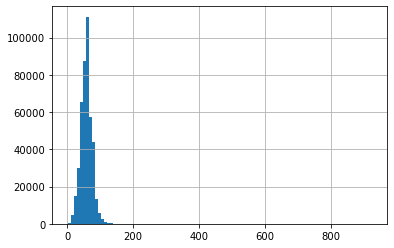

In [71]:
data['len'].hist(bins = 100)

In [72]:
data['token_len'] = data['headline'].apply(lambda x: len(x.split()))

<AxesSubplot:>

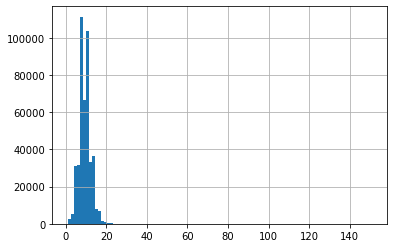

In [73]:
data['token_len'].hist(bins = 100)

In [74]:
### Some very long titles, will put in a max-len.

In [75]:
label_len_group = data.groupby(['token_len', 'is_sarcastic']).size().reset_index()
label_len_group

,token_len,is_sarcastic,0
0,1,0,313
1,1,1,8
2,2,0,1906
3,2,1,104
4,3,0,4984
...,...,...,...
70,44,1,1
71,56,1,1
72,57,1,1
73,71,1,1


In [76]:
label_len_group.iloc[35:45]

,token_len,is_sarcastic,0
35,18,1,534
36,19,0,356
37,19,1,383
38,20,0,187
39,20,1,247
40,21,0,100
41,21,1,161
42,22,0,32
43,22,1,101
44,23,0,11


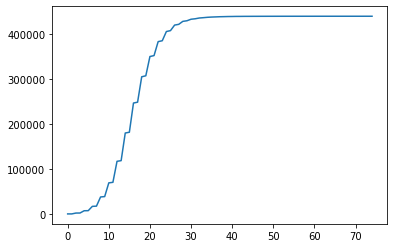

In [77]:
plt.plot(np.cumsum(label_len_group[0].values))

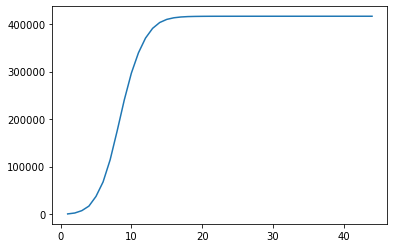

In [78]:
plt.plot(label_len_group.loc[label_len_group['is_sarcastic']==0]['token_len'].values, np.cumsum(label_len_group.loc[label_len_group['is_sarcastic']==0][0].values))

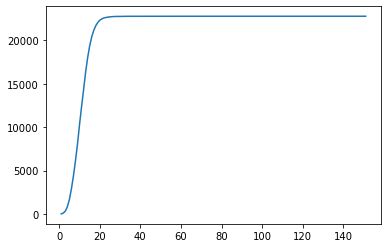

In [79]:
plt.plot(label_len_group.loc[label_len_group['is_sarcastic']==1]['token_len'].values,np.cumsum(label_len_group.loc[label_len_group['is_sarcastic']==1][0].values))

In [80]:
label_len_group.loc[label_len_group['is_sarcastic']==0]

,token_len,is_sarcastic,0
0,1,0,313
2,2,0,1906
4,3,0,4984
6,4,0,9552
8,5,0,20389
10,6,0,30449
12,7,0,46654
14,8,0,61357
16,9,0,64840
18,10,0,56387


In [81]:
max_len = 30

### Source Specific Language

In [40]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
clean = pd.read_csv('../data/combined_clean_v6.csv', sep = "|")
clean['token_len'] = clean['clean'].apply(lambda x: len(str(x).split()))
clean = clean.loc[clean['token_len'] > 0]
clean = clean.loc[clean['token_len'] <= 41]
clean.reset_index(inplace = True, drop = True)

In [93]:
clean.sort_values(by = 'token_len')

,source,year,clean,is_sarcastic,token_len
29781,Huffington Post,2017,antilent,0,1
186103,atlantic,2016,quoted,0,1
164732,atlantic,2019,uncontradicted,0,1
176932,atlantic,2017,NaN,0,1
68472,ABC Australia,2016,peacock,0,1
...,...,...,...,...,...
155653,nottheonion,2020,parents who sued a school district after their...,0,34
196197,onion,2018,one for the road seaworld has realized people ...,1,35
201351,onion,2020,hawks celtics nets hornets bulls cavs mavs nug...,1,37
199922,onion,2019,thomas jefferson the tree of liberty must be r...,1,37


In [94]:
clean.sample(n = 5)

,source,year,clean,is_sarcastic,token_len
125035,guardian,2020,coronavirus wuhan residents told to stay insid...,0,10
141633,guardian,2018,diplomacy and delusion books to understand dif...,0,11
167946,atlantic,2018,trumps top targets in the russia probe are exp...,0,12
21589,Huffington Post,2016,foreign tourists wounded in afghanistan ambush,0,6
142168,guardian,2018,florida man charged over shooting in stand you...,0,10


In [95]:
cv = feature_extraction.text.CountVectorizer(lowercase = True,
                                             strip_accents = 'ascii',
                                             ngram_range=(1,3),
                                             stop_words="english",
                                             max_df = .8,
                                             min_df = 10, binary = True)

In [96]:
train = clean.loc[clean['year'] != 2020]
test = clean.loc[clean['year'] == 2020]

X_train = train['clean'].values.astype('U')

In [97]:
print("Fitting Count Vectorizer")
cv.fit(X_train)
X_train_cv = cv.transform(X_train)

Fitting Count Vectorizer


In [98]:
train['source'].unique()

array(['Huffington Post', 'ABC Australia', 'npr', 'guardian',
       'nottheonion', 'atlantic', 'onion', 'reductress',
       'national report', 'Hard Times', 'Fox News'], dtype=object)

In [99]:
source_specific = []
for source in train['source'].unique():
    Y_train = train['source'].apply(lambda x: 1 if x == source else 0)
    lr_cv = LogisticRegression(max_iter = 100)
    lr_cv.fit(X_train_cv, Y_train)
    
    vocab = cv.get_feature_names()
    coef_dicts = []
    for i, coef_ in enumerate(list(lr_cv.coef_[0,:])):
        coef_dict = {'word': vocab[i], 'coef': coef_}
        coef_dicts.append(coef_dict)
    coef_pd = pd.DataFrame(coef_dicts)
    source_dict = {'source': source, 'phrases': coef_pd.sort_values('coef', ascending=False)['word'][:50].values}
    source_specific.append(source_dict)

C:\ProgramData\Anaconda3\envs\term_project\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\envs\term_project\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Pro

In [100]:
source_specific

[{'source': 'Huffington Post',
  'phrases': array(['huffpollster', 'huffpost', 'gps guide', 'morning email', 'looney',
         'hilariously', 'antilgbtq', 'maher', 'news roundup', 'tweeters',
         'nsfw', 'fk', 'spoof', 'daily meditation', 'riverdale',
         'gulf crisis', 'conan', 'spoton', 'sweetest', 'queer', 'adele',
         'hidden figures', 'excop', 'gawker', 'bachelor', 'lgbtq', 'behold',
         'cooking cuff', 'snl', 'terrorist attacks', 'away murder',
         'van jones', 'walking dead', 'mindful', 'labor day', 'updated',
         'reflections', 'nightmares', 'asianamerican', 'weekend roundup',
         'colbert', 'ellen', 'suicide squad', 'hilarious', 'educator',
         'trump terrible', 'recipes', 'adorably', 'sums', 'fking'],
        dtype=object)},
 {'source': 'ABC Australia',
  'phrases': array(['planet america', 'png', 'perth', 'canberra', 'wa', 'adelaide',
         'melbourne', 'nsw', 'queensland', 'sa', 'tasmania', 'brisbane',
         'talking pictures',

Huffington Post


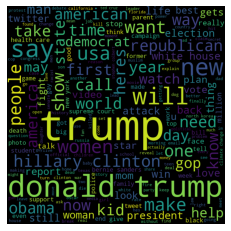

ABC Australia


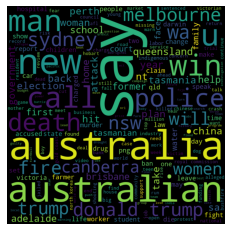

npr


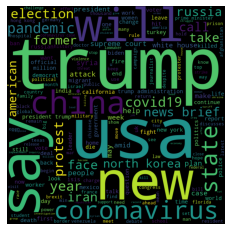

guardian


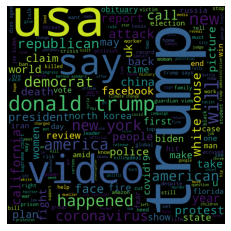

nottheonion


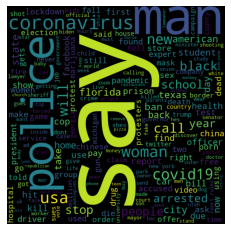

atlantic


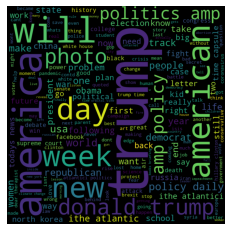

onion


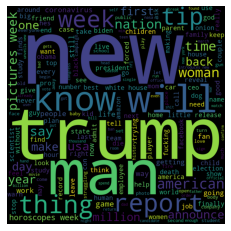

reductress


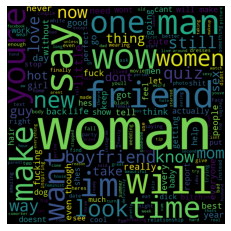

national report


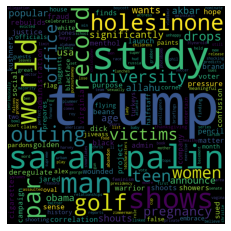

Hard Times


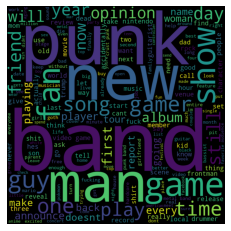

Fox News


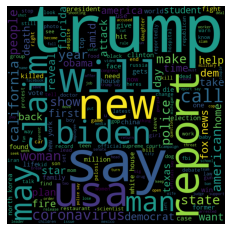

In [101]:
for source in clean['source'].unique():
    source_text = clean.loc[clean['source'] == source]['clean'].astype('U')

    wc = wordcloud.WordCloud(width = 800, height = 800).generate(" ".join(source_text))
    plt.imshow(wc)
    plt.axis("off")
    print(source)
    plt.show()